# Prédiction de la consommation électrique
<ul>
    <li>Données de ville de Tétouan au Maroc</li> 
    <ul>
        <li>Puissance de consommation en KW</li>
        <li>3 zones</li>
    </ul>
    <li>Série temporelle multivariée</li>  
     <ul>
        <li>Température, Humidité, vitesse du vent, …</li>
    </ul>
    <li>Données enregistrées sur l’année 2017</li>  

</ul>


In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import eli5
from eli5.sklearn import PermutationImportance

In [78]:
def display_consumption_daily(df_data, figsize=(20, 15), day_num="all"):
    """
    Permet d'afficher les séries temporelles relatives au consommations
    journalières.

    Parameters
    ----------
    df_data : pandas.DataFrame
        La base de données passée en paramètres.
    figsize : tuple, optional
        Dimensions de la figure servant à l'affichage des consommations
        journalières. La valeur par défaut est (20, 15).
    day_num : int, optional
        Numéro du jour de l'année concerné par l'affichage. Cette valeur doit
        être positive et inférieure ou égale à 365. 
        La valeur par défaut est "all".

    Raises
    ------
    ValueError
        DESCRIPTION.

    Returns
    -------
    None.

    """
    
    assert "DayOfYear" in df_data.columns,\
        "La colonne \'DayOfYear' n\'est pas présente dans la matrice de données"
    
    if isinstance(day_num, str):
        if day_num.lower()=="all":
            df_sub_data = df_data.copy()
        else:
            df_sub_data = None
            print("Le numéro du jour de l'année n'est pas valide : "
                  "valeur positive et inférieure à 365.")
            raise ValueError
    elif isinstance(day_num, int):
        if (day_num <= 365) & (day_num > 0):
            df_sub_data = df_data[df_data["DayOfYear"]==day_num]
        else:
            df_sub_data = None
            print("Le numéro du jour de l'année n'est pas valide : "
                  "valeur positive et inférieure à 365.")
            raise ValueError
    else:
            df_sub_data = None
            print("Le numéro du jour de l'année n'est pas valide : "
                  "valeur positive et inférieure à 365.")
            raise ValueError
    
    if df_sub_data is not None:
        import matplotlib.pyplot as plt
        
        ax_multiplot = df_sub_data[['Zone 1 Power Consumption', 'Zone 2 Power Consumption', 'Zone 3 Power Consumption']].plot(subplots=True, sharey=True, figsize=(15, 7))
        ax_multiplot[0].set_ylabel("Power consumption (KW)")
        ax_multiplot[1].set_ylabel("Power consumption (KW)")
        ax_multiplot[2].set_ylabel("Power consumption (KW)")

In [84]:
def display_consumption_monthly(df_data, figsize=(20, 15), month_num="all"):
    """
    Permet d'afficher les séries temporelles des consommations mensuelles
    des 3 zones.

    Parameters
    ----------
    df_data : pandas.DataFrame
        La matrice des données passée en paramètres.
    figsize : tuple, optional
        La taille de la fenêtre utilisée pour l'affichage. La valeur par 
        défaut est (20, 15).
    month_num : int, optional
        Le numéro de mois concerné par l'affichage. Cette valeur doit être
        posiive et inférieure ou égale à 12. Pour afficher toutes
        les données utilisées on peut indiquer "all". 
        La valeur par défaut est "all".

    Raises
    ------
    ValueError
        Exception levée quand la valeur du numéro du mois n'est pas valide.

    Returns
    -------
    None.

    """
    
    assert "Month" in df_data.columns, \
        "La colonne \'Month' n\'est pas présente dans la matrice de données"
    
    if isinstance(month_num, str):
        if month_num.lower()=="all":
            df_sub_data = df_data.copy()
        else:
            df_sub_data = None
            print("Le numéro du mois de l'année n'est pas valide : "
                  "valeur positive et inférieure à 12.")
            raise ValueError
    elif isinstance(month_num, int):
        if (month_num <= 12) & (month_num > 0):
            df_sub_data = df_data[df_data["Month"]==month_num]
        else:
            df_sub_data = None
            print("Le numéro du mois de l'année n'est pas valide : "
                  "valeur positive et inférieure à 12.")
            raise ValueError
    else:
            df_sub_data = None
            print("Le numéro du mois de l'année n'est pas valide : "
                  "valeur positive et inférieure à 12.")
            raise ValueError
    
    if df_sub_data is not None:
        import matplotlib.pyplot as plt

        ax_multiplot = df_sub_data[['Zone 1 Power Consumption', 'Zone 2 Power Consumption', 'Zone 3 Power Consumption']].plot(subplots=True, sharey=True, figsize=(15, 7))
        ax_multiplot[0].set_ylabel("Power consumption (KW)")
        ax_multiplot[1].set_ylabel("Power consumption (KW)")
        ax_multiplot[2].set_ylabel("Power consumption (KW)")

In [ ]:
def display_consumption_period(df_data, figsize=(20, 15), start_date="2017-01-01" , end_date="2017-12-30"):
    """
    Permet d'afficher les séries temporelles des consommations mensuelles
    des 3 zones sur une période de temps.

    Parameters
    ----------
    df_data : pandas.DataFrame
        La matrice des données passée en paramètres.
    figsize : tuple, optional
        La taille de la fenêtre utilisée pour l'affichage. La valeur par 
        défaut est (20, 15).
    start_date : datetime, optional
        La date de début de la période concerné par l'affichage. Cette date 
        doit être comprise dans l'année 2017
    end_date : datetime, optional
        La date de fin de la période concerné par l'affichage. Cette date 
        doit être comprise dans l'année 2017 et supérieure à la date de début.

    Raises
    ------
    ValueError
        Exception levée quand les dates ne sont pas dans l'année 2017 et également 
        lorsque la date de fin est inférieur à la date de début.

    Returns
    -------
    None.

    """
    
#     assert "Month" in df_data.columns, \
#         "La colonne \'Month' n\'est pas présente dans la matrice de données"
    
    if isinstance(start_date, str):
        if month_num.lower()=="all":
            df_sub_data = df_data.copy()
        else:
            df_sub_data = None
            print("Le numéro du mois de l'année n'est pas valide : "
                  "valeur positive et inférieure à 12.")
            raise ValueError
    elif isinstance(month_num, int):
        if (month_num <= 12) & (month_num > 0):
            df_sub_data = df_data[df_data["Month"]==month_num]
        else:
            df_sub_data = None
            print("Le numéro du mois de l'année n'est pas valide : "
                  "valeur positive et inférieure à 12.")
            raise ValueError
    else:
            df_sub_data = None
            print("Le numéro du mois de l'année n'est pas valide : "
                  "valeur positive et inférieure à 12.")
            raise ValueError
    
    if df_sub_data is not None:
        import matplotlib.pyplot as plt

        ax_multiplot = df_sub_data[['Zone 1 Power Consumption', 'Zone 2 Power Consumption', 'Zone 3 Power Consumption']].plot(subplots=True, sharey=True, figsize=(15, 7))
        ax_multiplot[0].set_ylabel("Power consumption (KW)")
        ax_multiplot[1].set_ylabel("Power consumption (KW)")
        ax_multiplot[2].set_ylabel("Power consumption (KW)")

In [95]:
def display_consumption_resume(df_data, scale="Hours", figsize=(10, 8)):
    """
    Permet d'afficher les consommations de façon compacte à l'aide de boite à
    moustaches sur une echelle mensuelle ou journalière.

    Parameters
    ----------
    df_data : pandas.DataFrame
        La matrice contenant les données d'entrée passées en paramètres.
    scale : str, optional
        L'achelle de temps sur laquelle on veut analyser les enregistrements.
        Seules les échelles journalière (Hours) et mensuelle (Months) 
        sont disponibles. La valeur par défaut est "Hours".
    figsize : tuple, optional
        Dimensions de la figure utilisée pour l'affichage. La valeur par 
        défaut est (10, 8).

    Raises
    ------
    ValueError
        DESCRIPTION.
    TypeError
        DESCRIPTION.

    Returns
    -------
    None.

    """

    if isinstance(scale, str):
        
        import seaborn as sns
        import matplotlib.pyplot as plt
        
        if scale.lower()=="hours":
            fig, axis = plt.subplots(3,1, figsize=figsize, sharey=True,
                                     sharex=True, constrained_layout=True)    
        
            sns.boxplot(data=df_data, x='Hour', y='Zone 1 Power Consumption', 
                        ax=axis[0], palette='Reds')
            sns.boxplot(data=df_data, x='Hour', y='Zone 2 Power Consumption', 
                        ax=axis[1], palette='Blues')
            sns.boxplot(data=df_data, x='Hour', y='Zone 3 Power Consumption', 
                        ax=axis[2], palette='Greens')
            axis[0].set_title('Zone 1 consumption power (KW) by Hour')
            axis[1].set_title('Zone 2 consumption power (KW) by Hour')
            axis[2].set_title('Zone 3 consumption power (KW) by Hour')
            
            for i in range(3):
                axis[i].set_xlabel('Hours')
                axis[i].set_ylabel('Consumption power (KW)')
        elif scale.lower()=="months":
            fig, axis = plt.subplots(3,1, figsize=figsize, sharey=True,
                                     sharex=True, constrained_layout=True) 
            sns.boxplot(data=df_data, x='Month', y='Zone 1 Power Consumption', 
                        ax=axis[0], palette='Reds')
            sns.boxplot(data=df_data, x='Month', y='Zone 2 Power Consumption',
                        ax=axis[1], palette='Blues')
            sns.boxplot(data=df_data, x='Month', y='Zone 3 Power Consumption', 
                        ax=axis[2], palette='Greens')
            axis[0].set_title('Zone 1 consumption power (KW) by Hour')
            axis[1].set_title('Zone 2 consumption power (KW) by Hour')
            axis[2].set_title('Zone 3 consumption power (KW) by Hour')
            
            for i in range(3):
                axis[i].set_xlabel('Months')
                axis[i].set_ylabel('Consumption power (KW)')
        else:
            print("La valeur de l'échelle de temps n'est pas conforme: '"
                  "Hours' ou 'Months'.")
            raise ValueError
    else:
        print("L\'échelle de temps doit être une chaine de caractères.")
        raise TypeError

In [76]:
#File energy path
file_energy = "./Datasets/Tetuan_City_power_consumption.csv"

### Loading data

In [77]:
#File energy path
file_energy = "./Datasets/Tetuan_City_power_consumption.csv"
df_energy = pd.read_csv(file_energy)

### Understanding Features 

In [78]:
#let's display the 5 first lines of our  dataset
display(df_energy)

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [79]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DateTime                  52416 non-null  object 
 1   Temperature               52416 non-null  float64
 2   Humidity                  52416 non-null  float64
 3   Wind Speed                52416 non-null  float64
 4   general diffuse flows     52416 non-null  float64
 5   diffuse flows             52416 non-null  float64
 6   Zone 1 Power Consumption  52416 non-null  float64
 7   Zone 2 Power Consumption  52416 non-null  float64
 8   Zone 3 Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [80]:
#Get columns of our dataset
data_columns =  df_energy.columns
data_columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2 Power Consumption', 'Zone 3 Power Consumption'],
      dtype='object')

In [81]:
# Format dateTime columns
df_energy = pd.read_csv(file_energy)
df_energy['DateTime'] = pd.to_datetime(df_energy['DateTime'])

### Pre-proccessing and Normalisation 

In [34]:
##Get names of columns with missing values
missing_column=[col for col in  df_energy.columns if  df_energy[col].isnull().any()]
missing_column

[]

<p>Let's note that we are only datetimes which is categorical variable.According to the Data we can't need it to do ours job. Both we can encoding it</p>

### Statistical analysis

In [37]:
#Let's diplay a basic statical 
df_energy.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


###  Visualisation

Text(0, 0.5, 'Vitesse du vent (Km/h)')

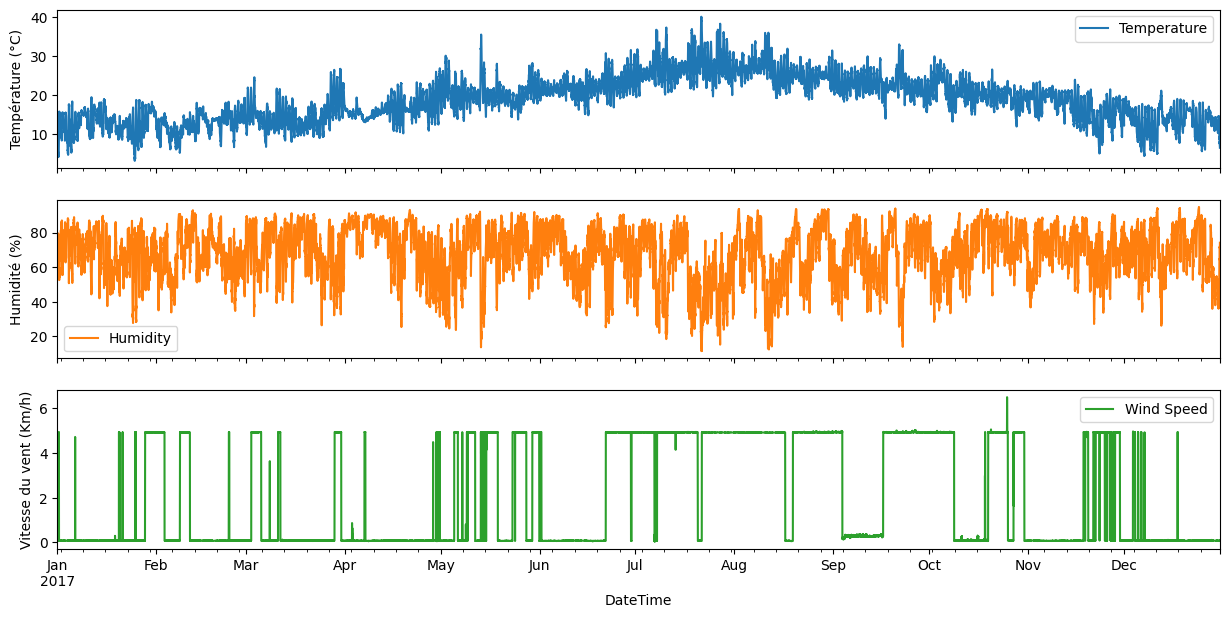

In [38]:
#visualisation de la température, de l'humidité et la vitesse du vent
# mask_period =  "2017-05-01":"2017-05-20", ['Temperature', 'Humidity', 'Wind Speed']
# mask_feature == ['Temperature', 'Humidity', 'Wind Speed']
ax_multiplot = df_energy[['Temperature', 'Humidity', 'Wind Speed']].plot(subplots=True, figsize=(15, 7))
ax_multiplot[0].set_ylabel("Température (°C)")
ax_multiplot[1].set_ylabel("Humidité (%)")
ax_multiplot[2].set_ylabel("Vitesse du vent (Km/h)")


In [39]:
df_energy['DayOfYear'] = df_energy.index.dayofyear
df_energy['Month'] = df_energy.index.month
df_energy

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,DayOfYear,Month
DateTime,,,,,,,,,,,
2017-01-01 00:00:00,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,1,1
2017-01-01 00:10:00,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,1,1
2017-01-01 00:20:00,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,1,1
2017-01-01 00:30:00,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,1,1
2017-01-01 00:40:00,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 23:10:00,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,364,12
2017-12-30 23:20:00,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,364,12
2017-12-30 23:30:00,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,364,12


In [40]:
#visualisation de la consommation d'énergie sur l'année par zones 
display_consumption_daily(df_data=df_energy, figsize=(20, 15), day_num='all')

NameError: name 'display_consumption_daily' is not defined

In [41]:
#consommation mensuelle 
display_consumption_monthly(df_data=df_energy, figsize=(20, 15), month_num=1)

NameError: name 'display_consumption_monthly' is not defined

In [42]:
#consommation intrajournalière 
display_consumption_daily(df_data=df_energy, figsize=(20, 15), day_num=54)

NameError: name 'display_consumption_daily' is not defined

<AxesSubplot: >

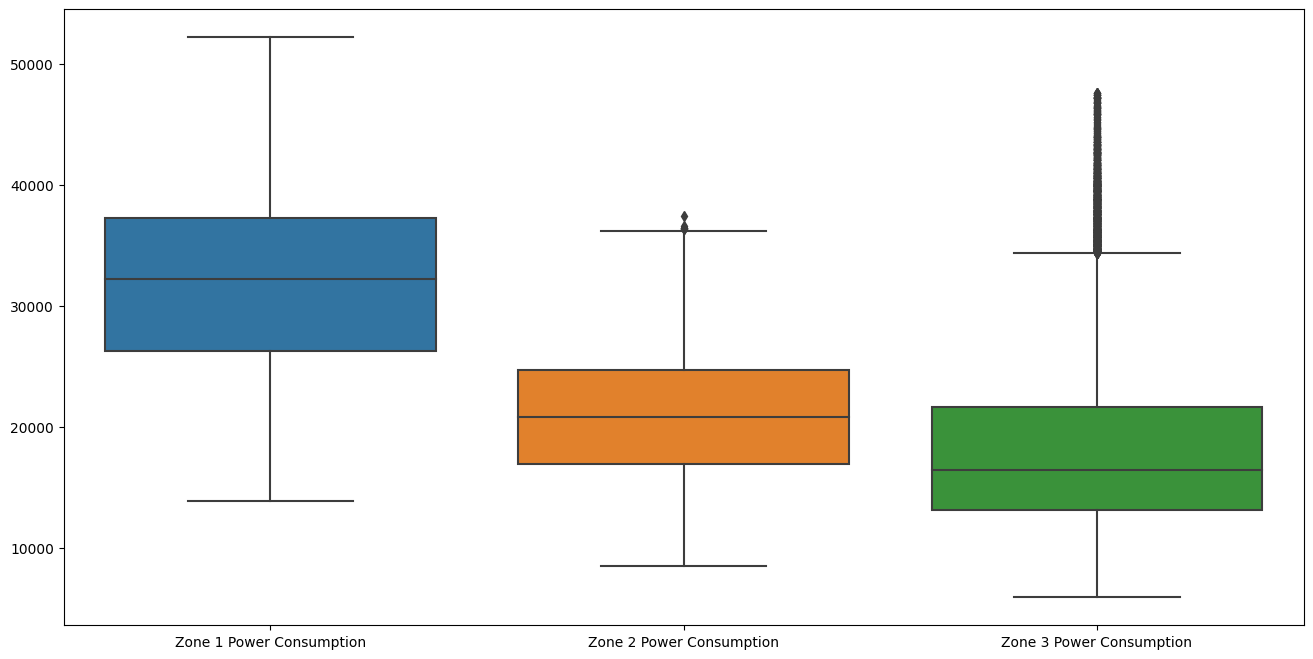

In [43]:
# boxplot de la consommation énergétique par zone
plt.figure(figsize=(16,8))
data_feature=df_energy[["Zone 1 Power Consumption","Zone 2 Power Consumption","Zone 3 Power Consumption"]]
sns.boxplot(data=data_feature)#, labels=mask_feature)
# plt.show

In [44]:
df_energy['Hour'] = df_energy.index.hour
# df_energy['DayOfWeek'] = df_data.index.dayofweek
#df_data['Quarter'] = df_data.index.quarter
df_energy['Month'] = df_energy.index.month
display_consumption_resume(df_energy, scale="Hours", figsize=(10, 8))

NameError: name 'display_consumption_resume' is not defined

In [45]:
display_consumption_resume(df_energy, scale="Months", figsize=(10, 8))

NameError: name 'display_consumption_resume' is not defined

Text(0.5, 1.0, "Histogramme de la consommation d'énergie zone 3")

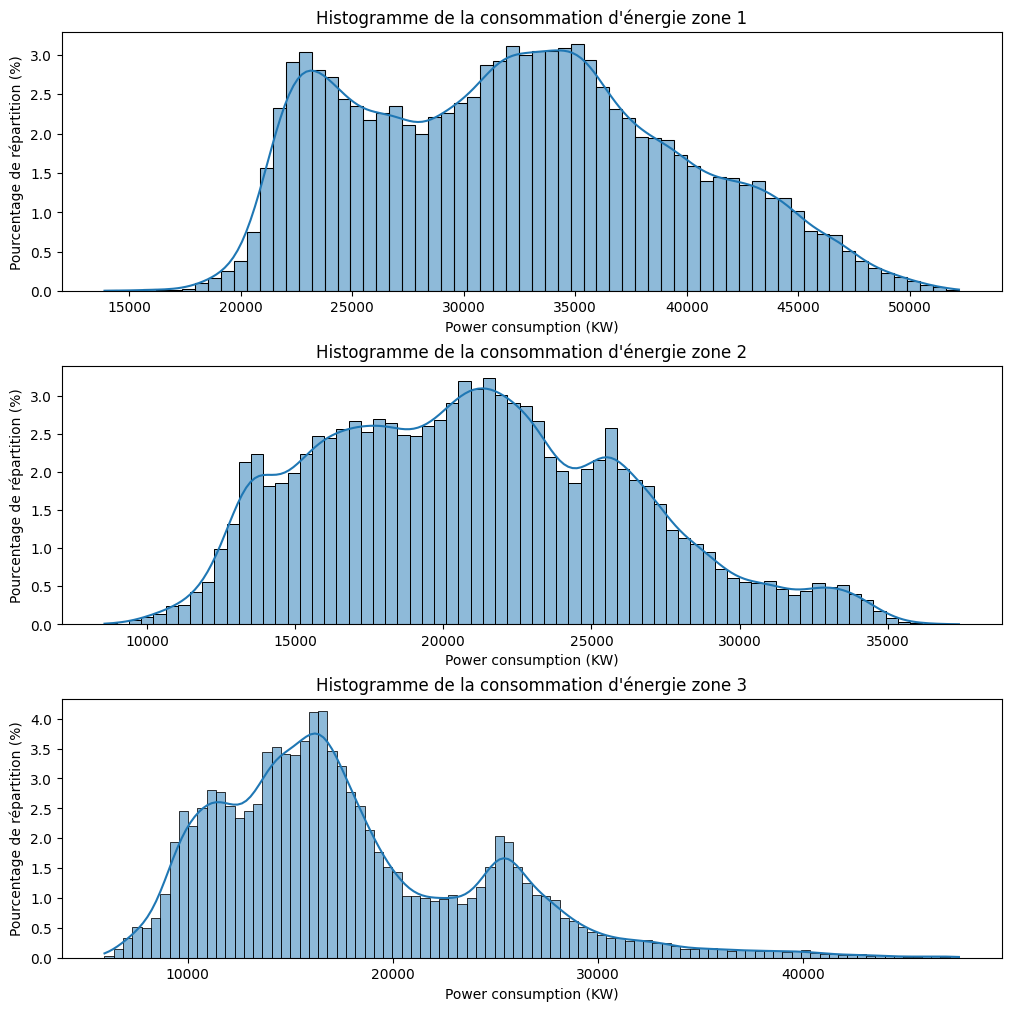

In [46]:
fig, axis = plt.subplots(3,1, figsize=(10,10), constrained_layout=True)
sns.histplot(data=df_energy, x="Zone 1 Power Consumption", stat="percent", kde=True, ax=axis[0])
sns.histplot(data=df_energy, x="Zone 2 Power Consumption", stat="percent", kde=True, ax=axis[1])
sns.histplot(data=df_energy, x="Zone 3 Power Consumption", stat="percent", kde=True, ax=axis[2])

axis[0].set_xlabel('Power consumption (KW)')
axis[0].set_ylabel('Pourcentage de répartition (%)')
axis[0].set_title("Histogramme de la consommation d'énergie zone 1")

axis[1].set_xlabel('Power consumption (KW)')
axis[1].set_ylabel('Pourcentage de répartition (%)')
axis[1].set_title("Histogramme de la consommation d'énergie zone 2")

axis[2].set_xlabel('Power consumption (KW)')
axis[2].set_ylabel('Pourcentage de répartition (%)')
axis[2].set_title("Histogramme de la consommation d'énergie zone 3")


C:\Users\osees\AppData\Local\Temp\ipykernel_18296\1168597189.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_energy.corr()


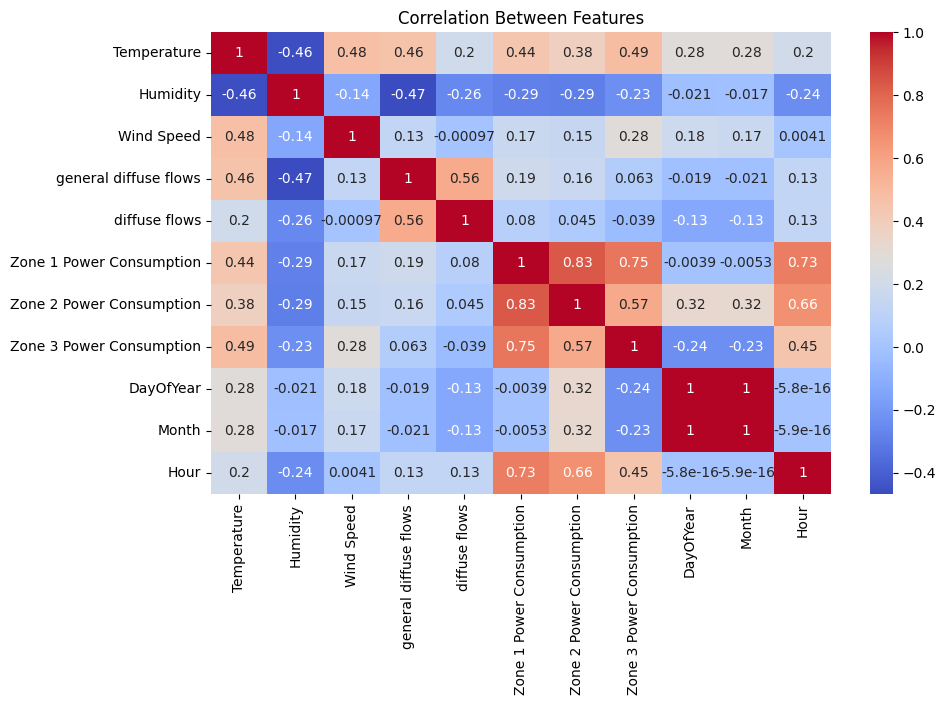

In [47]:
plt.figure(figsize=(10, 6))
# Heatmap of correlation between features
corr = df_energy.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Between Features')
plt.show()

### Decomposition en saisonnalité et tendance

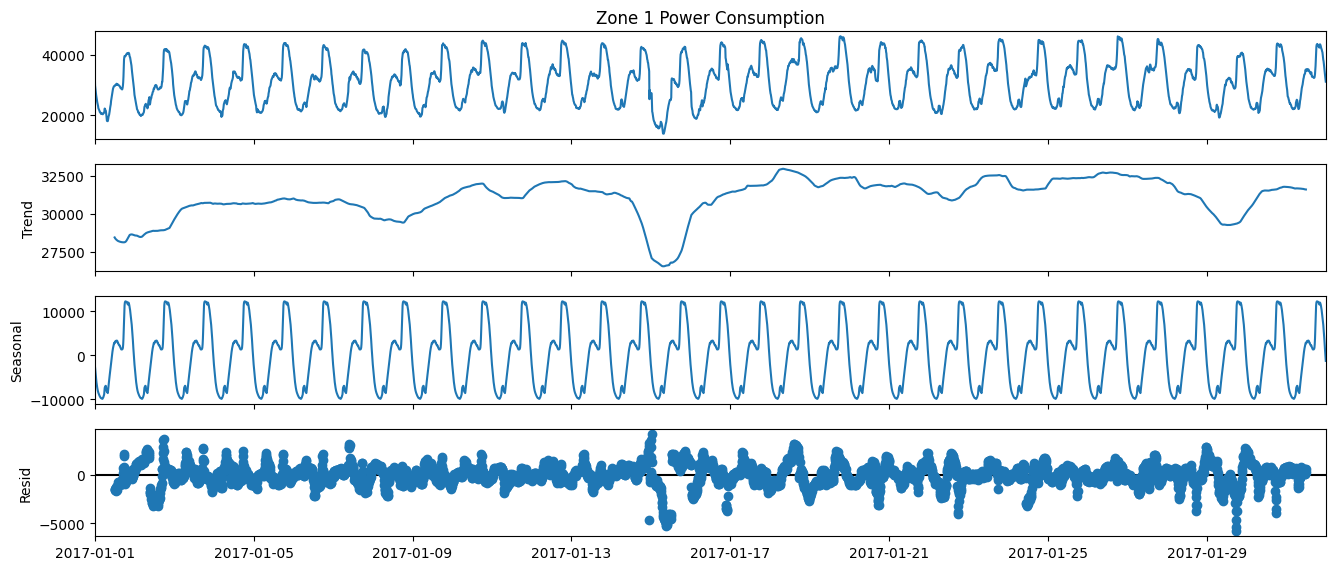

In [48]:
decomposition = seasonal_decompose(df_energy.loc["2017-01", "Zone 1 Power Consumption"], period=6*24)

fig=decomposition.plot()
fig.set_size_inches((15, 6))

### Autocorrélation

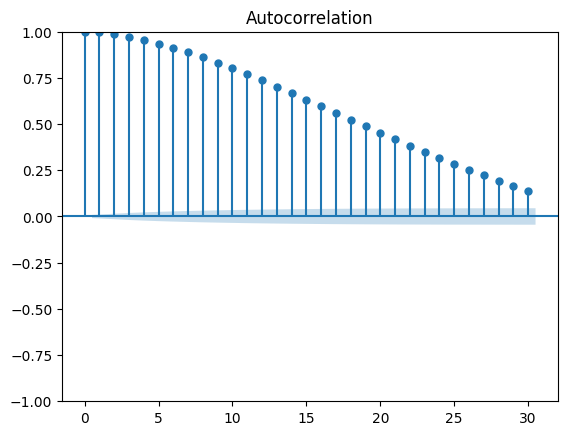

In [49]:
from statsmodels.graphics import tsaplots

#plot autocorrelation function
fig = tsaplots.plot_acf(df_energy["Zone 1 Power Consumption"], lags=30)
plt.show()

In [134]:
#File energy path
file_energy = "./Datasets/Tetuan_City_power_consumption.csv"

# Format dateTime columns
df_energy = pd.read_csv(file_energy)
df_energy['DateTime'] = pd.to_datetime(df_energy['DateTime'])

In [135]:
df_energy
df_energy2=df_energy
df_energy2

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


### Normaliisation 

In [136]:
#Columns containing categorical variable 
s = (df_energy.dtypes == 'object')
object_cols = list(s[s].index)

print(f"Categorical variables:",object_cols)
print(f"There are {len(object_cols)} ")

Categorical variables: []
There are 0 


In [137]:
#Encoding the dataset data 
ordinal_encoder = OrdinalEncoder()
df_energy[object_cols]=ordinal_encoder.fit_transform(df_energy[object_cols])
df_energy.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


### Creation d'un siple model de Random Forest 
<p> Nous allaons crée les models  en prenant pour target la consommation dans chaque Zone</p>


In [138]:
"""#Encodage de la colonne DataTime
ordinal_encoder = OrdinalEncoder()
df_energy["DateTime"]=ordinal_encoder.fit_transform(df_energy[object_cols])
df_energy.head()"""

'#Encodage de la colonne DataTime\nordinal_encoder = OrdinalEncoder()\ndf_energy["DateTime"]=ordinal_encoder.fit_transform(df_energy[object_cols])\ndf_energy.head()'

In [139]:
#Selection des trois target
taget1 = df_energy["Zone 1 Power Consumption"]
taget2=df_energy["Zone 2 Power Consumption"]
taget3=df_energy["Zone 3 Power Consumption"]


In [140]:
X=df_energy
X.drop(["Zone 1 Power Consumption","Zone 2 Power Consumption","Zone 3 Power Consumption","DateTime"],axis=1,inplace=True)


In [141]:

#Division des tdonnées en données de test et entrînement du models
def devide_data(features,target):   
    X_train,X_val,y_train,y_val=train_test_split(features,target) 
    return (X_train,X_val,y_train,y_val) 


In [168]:

#Our Simple Model 
def simple_model(X_train,y_train,X_val,y_val,n_estimators=100):
    model=RandomForestRegressor(n_estimators=n_estimators,random_state=0)
    model.fit(X_train,y_train,)
    prediction=model.predict(X_val)
    print(f"The MAE of prediction for our model is:{ mean_absolute_error(prediction,y_val)}")
    return model


In [155]:
#Feature importance 
def feature_importance (X_val,y_val,model):
    perm=PermutationImportance(model,random_state=1).fit(X_val,y_val)
    eli5.show_weights(perm,feature_names = X_val.columns.tolist())

In [175]:
def detect_best_estimator(X_train,y_train,X_val,y_val,estimator):
    model=RandomForestRegressor(n_estimators=estimator,random_state=0)
    model.fit(X_train,y_train)
    pred = model.predict(X_val)
    return mean_absolute_error(pred,y_val)

## ZONE 1

In [159]:
#Entraînement du model1
X_train1,X_val1,y_train1,y_val1= devide_data(X,taget1)
model1 = simple_model(X_train1,y_train1,X_val1,y_val1)
print(model1)

The MAE of prediction for our model is:3242.3911061974973
RandomForestRegressor(random_state=0)


In [162]:
#Voir les futures importants du model
feature_importance(X_val1,y_val1,model1)

In [176]:
#Chercher le bon estimator
estimators_dict={}
for i in [5,10,15,20,25,30,35,40,45,50,100,150,200,250,300]:
    estimators_dict[i]=detect_best_estimator(X_train1,y_train1,X_val1,y_val1,i) 
    
#get best estimator
best_estimator=min(estimators_dict,key=lambda k: estimators_dict[k])
best_estimator

300

In [169]:
#Nous allons refaire le model avec la bonne estimator
model1=model1 = simple_model(X_train1,y_train1,X_val1,y_val1,n_estimators = best_estimator)


The MAE of prediction for our model is:3458.033650196734


## ZONE 2

In [144]:
X_train2,X_val2,y_train2,y_val2= devide_data(X,taget2)
model2 =simple_model(X_train2,y_train2,X_val2,y_val2)

The MAE of prediction for our model is:2400.2064921529977


In [ ]:
feature_importance(X_val1,y_val1,model2)

## ZONE3

In [145]:
model3 =X_train3,X_val3,y_train3,y_val3= devide_data(X,taget3)
simple_model(X_train3,y_train3,X_val3,y_val3)

The MAE of prediction for our model is:2408.1733063276442


In [ ]:
feature_importance(X_val1,y_val1,model1)